# Método de Gradiente


Se cargan los módulos necesarios para el entorno `SnakeEnv`, operaciones matemáticas y graficación.

In [ ]:
from snake_v1 import SnakeEnv
import numpy as np
import matplotlib.pyplot as plt
import pygame

# Inicialización de preferencias y parámetros
Se establecen las preferencias de acciones (tabla H) y se definen las tasas de aprendizaje, turnos y demás configuraciones.

In [ ]:
env = SnakeEnv()

# Parámetros
episodes = 2000
alpha = 0.1    # Tasa de aprendizaje para valores Q
beta = 0.1     # Tasa de aprendizaje para preferencias
gamma = 0.9    # Factor de descuento
scores = []

# Diccionarios para el método de gradiente
H = {}         # Preferencias de acciones
Q = {}         # Valores Q
baseline = 0   # Valor de referencia

In [16]:
def softmax(preferences):
    """Calcula probabilidades usando softmax"""
    exp_pref = np.exp(preferences - np.max(preferences))
    return exp_pref / np.sum(exp_pref)

def choose_action(state):
    """Selecciona acción usando el método de gradiente"""
    if state not in H:
        H[state] = np.zeros(len(env.actions))
        Q[state] = np.zeros(len(env.actions))
    
    probabilities = softmax(H[state])
    return np.random.choice(len(env.actions), p=probabilities)

def update_preferences(state, action, reward, baseline):
    """Actualiza las preferencias de acciones"""
    probabilities = softmax(H[state])
    for a in range(len(env.actions)):
        if a == action:
            H[state][a] += beta * (reward - baseline) * (1 - probabilities[a])
        else:
            H[state][a] -= beta * (reward - baseline) * probabilities[a]

# Entrenamiento con método basado en gradiente
Se entrena al agente usando el método de preferencia de acciones con softmax, ajustando probabilidades y recompensas acumuladas.

In [17]:
# Entrenamiento
rewards_history = []
average_reward = 0

for episode in range(episodes):
    state = env.reset()
    episode_reward = 0
    done = False
    
    while not done:
        action = choose_action(state)
        next_state, reward, done = env.step(action)
        episode_reward += reward
        
        # Actualizar valor de referencia
        average_reward = 0.95 * average_reward + 0.05 * reward
        
        # Actualizar preferencias y valores Q
        update_preferences(state, action, reward, average_reward)
        
        if state not in Q:
            Q[state] = np.zeros(len(env.actions))
        old_value = Q[state][action]
        next_max = np.max(Q[next_state]) if next_state in Q else 0
        Q[state][action] = old_value + alpha * (reward + gamma * next_max - old_value)
        
        state = next_state
    
    scores.append(env.score)
    rewards_history.append(episode_reward)
    
    if (episode + 1) % 100 == 0:
        print(f"Episodio {episode + 1}, Promedio últimos 100: {np.mean(scores[-100:]):.2f}")

Episodio 100, Promedio últimos 100: 0.25
Episodio 200, Promedio últimos 100: 0.43
Episodio 300, Promedio últimos 100: 0.68
Episodio 400, Promedio últimos 100: 0.92
Episodio 500, Promedio últimos 100: 2.17
Episodio 600, Promedio últimos 100: 2.72
Episodio 700, Promedio últimos 100: 2.96
Episodio 800, Promedio últimos 100: 3.11
Episodio 900, Promedio últimos 100: 4.09
Episodio 1000, Promedio últimos 100: 3.68
Episodio 1100, Promedio últimos 100: 4.46
Episodio 1200, Promedio últimos 100: 4.38
Episodio 1300, Promedio últimos 100: 3.93
Episodio 1400, Promedio últimos 100: 4.71
Episodio 1500, Promedio últimos 100: 3.36
Episodio 1600, Promedio últimos 100: 4.71
Episodio 1700, Promedio últimos 100: 5.16
Episodio 1800, Promedio últimos 100: 5.14
Episodio 1900, Promedio últimos 100: 5.86
Episodio 2000, Promedio últimos 100: 5.03


# Visualización de desempeño
Se representan gráficamente las recompensas y la tasa de exploración según el valor de la tasa de aprendizaje utilizada.

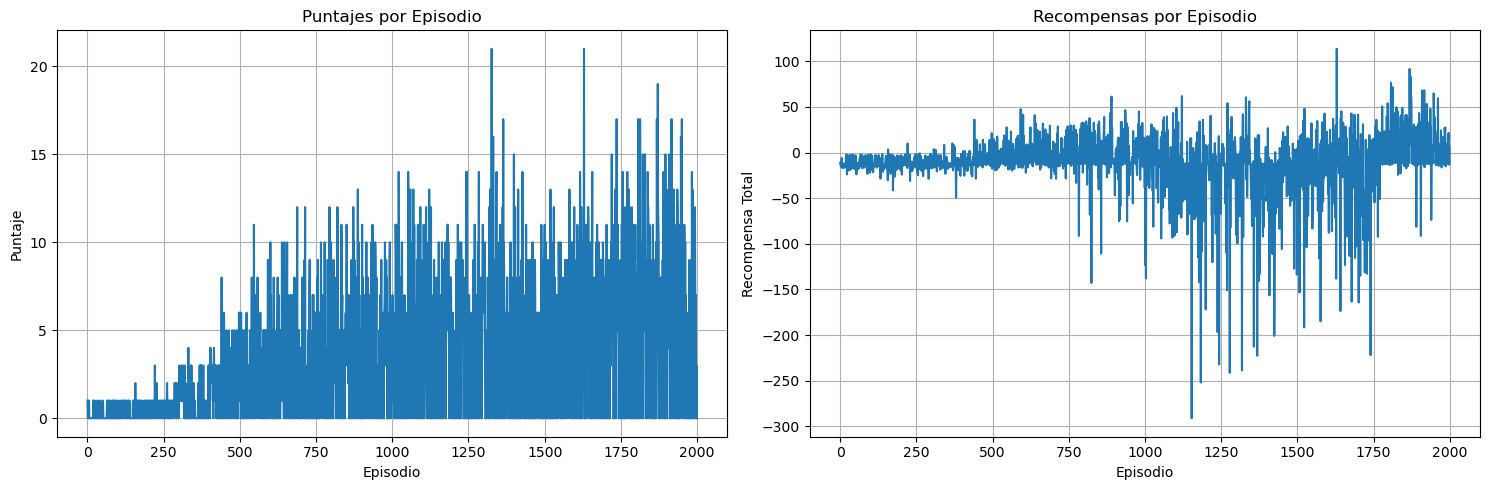

Puntaje promedio en últimos 100 episodios: 5.03
Recompensa promedio en últimos 100 episodios: 4.43


In [18]:
# Visualización de resultados
plt.figure(figsize=(15, 5))

# Subplot para puntajes
plt.subplot(1, 2, 1)
plt.plot(scores)
plt.title('Puntajes por Episodio')
plt.xlabel('Episodio')
plt.ylabel('Puntaje')
plt.grid(True)

# Subplot para recompensas
plt.subplot(1, 2, 2)
plt.plot(rewards_history)
plt.title('Recompensas por Episodio')
plt.xlabel('Episodio')
plt.ylabel('Recompensa Total')
plt.grid(True)

plt.tight_layout()
plt.show()

# Estadísticas finales
print(f"Puntaje promedio en últimos 100 episodios: {np.mean(scores[-100:]):.2f}")
print(f"Recompensa promedio en últimos 100 episodios: {np.mean(rewards_history[-100:]):.2f}")

# Demostración del Agente con Método de Gradiente

In [19]:
# Demostración del agente entrenado
def play_trained_agent():
    state = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        pygame.event.pump()
        # Usar la política aprendida (sin exploración)
        action = np.argmax(Q.get(state, np.zeros(len(env.actions))))
        state, reward, done = env.step(action)
        total_reward += reward
        env.render()
        pygame.time.delay(100)
    
    pygame.quit()
    return total_reward, env.score

# Ejecutar demostración
reward, score = play_trained_agent()
print(f"Demostración finalizada - Puntaje: {score}, Recompensa total: {reward}")

Demostración finalizada - Puntaje: 26, Recompensa total: 203.50000000000136
